# Illustration du fonctionnement de KMeans

Commençons par créer un dataset artificiel

In [36]:
from sklearn.datasets import make_blobs  # Fonction pour générer des données artificielles regroupées en blobs (nuages de points)
import matplotlib.pyplot as plt  # Bibliothèque pour tracer des graphiques

n_samples = 1500  # On veut générer 1500 points de données
random_state = 12  # "Graine" pour contrôler l'aléatoire → toujours les mêmes points si on relance le code (n'importe quel nombre fonctionne)

# Génération des données :
# X contient les coordonnées (features) des points
# y contient les "vrais" labels des clusters (juste pour visualisation, pas utilisés par K-Means)
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

X.shape  # Affiche la forme de X → (1500, 2) = 1500 points avec 2 dimensions (x, y)


(1500, 2)

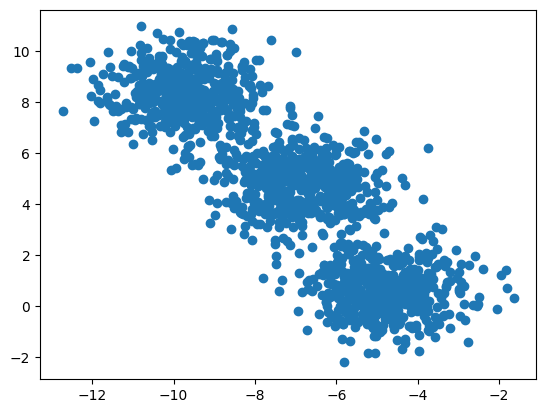

In [37]:
plt.scatter(X[:, 0], X[:, 1])  # Trace les points du dataset X en 2D : X[:, 0] = axe des x, X[:, 1] = axe des y

Nous avons généré 3 centres avec des données réparties (avec un peu d'aléatoire) autour de ces centres. Ainsi, nous aimerions arriver à obtenir le clustering le plus proche du suivant :

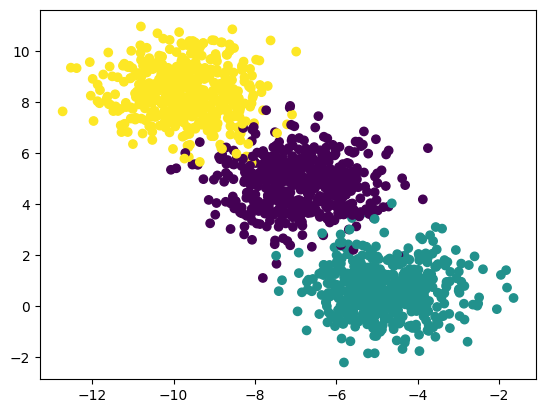

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y)  # Affiche les points avec une couleur différente par groupe (selon les vrais labels de y)

## Principe de fonctionnement

### On commence par choisir 3 centroides de clusters

In [39]:
from sklearn.metrics import pairwise_distances_argmin  # Permet de trouver l'indice du centroïde le plus proche pour chaque point
import numpy as np

# 1. On fixe le nombre de clusters (groupes)
n_clusters = 3  # On veut créer 3 groupes dans les données

# 2. On initialise un générateur aléatoire avec une seed fixe pour toujours avoir le même résultat
rng = np.random.RandomState(random_state)  # Crée un générateur aléatoire contrôlé (grâce à random_state = 12)

# 3. On mélange tous les indices des points, puis on prend les 3 premiers pour initialiser les centroïdes
i = rng.permutation(X.shape[0])[:n_clusters]  # Mélange aléatoire des indices de X (ici 1500 points), et on en prend 3

# 4. On sélectionne les 3 points correspondants à ces indices comme centroïdes de départ
centers = X[i]  # On récupère les coordonnées des points choisis → ce sont les centroïdes initiaux


print(i)        # Affiche les indices des points choisis comme centroïdes initiaux
print(centers)  # Affiche les coordonnées (x, y) de ces 3 centroïdes


[1160  667  949]
[[-5.8632403   1.37365687]
 [-7.57420376  5.87163268]
 [-3.7588659   0.99033396]]


### On affecte ensuite chaque point au cluster représenté par le centroide le plus proche

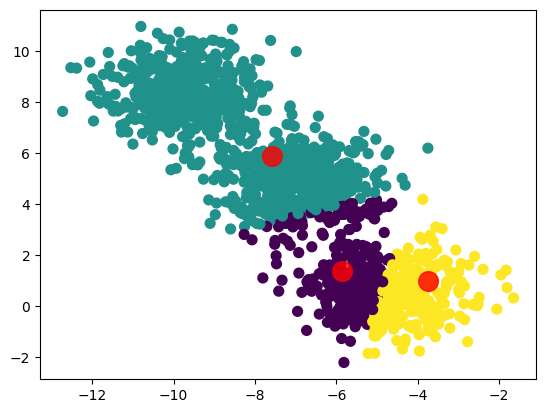

In [40]:
labels = pairwise_distances_argmin(X, centers)  # Attribue chaque point au centroïde le plus proche


plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')  # Affiche les points colorés par cluster
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)  # Affiche les centroïdes en rouge


### On calcule le centroide des clusters nouvellement formés

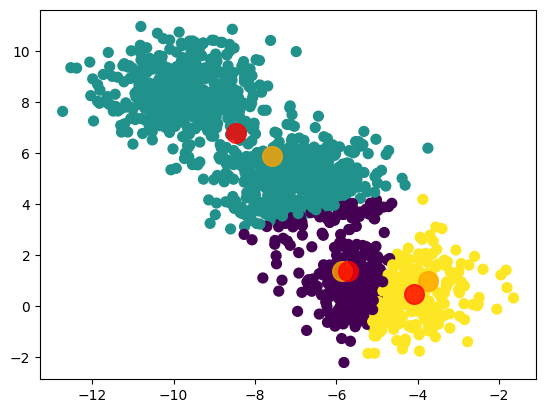

In [41]:
new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])  # Calcule les nouveaux centroïdes (moyenne des points de chaque cluster)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')  # Affiche les points colorés par cluster
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)  # Ancien centroïdes en orange
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='red', s=200, alpha=0.8)  # Nouveaux centroïdes en rouge


### Et on recommence jusqu'à convergence de l'algorithme

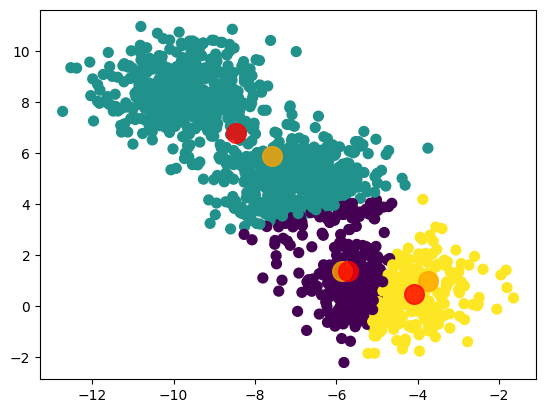

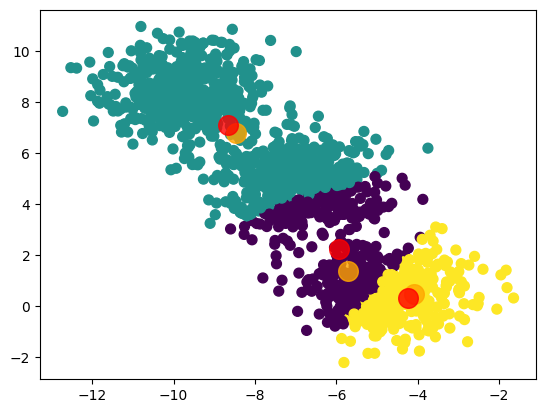

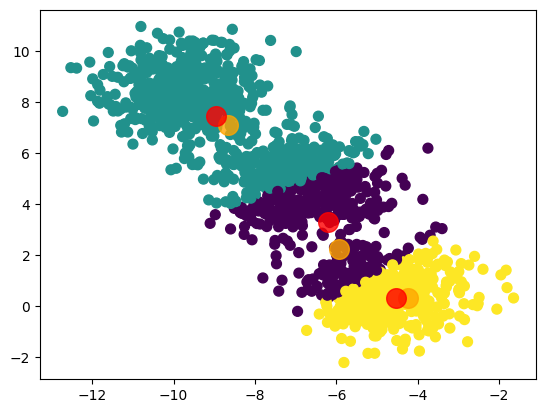

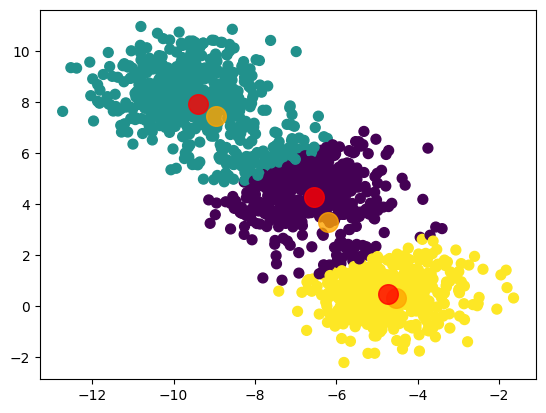

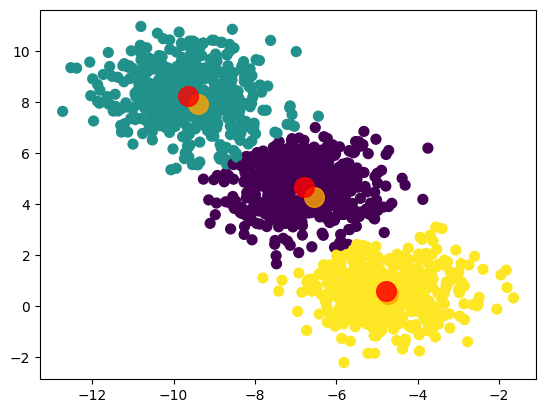

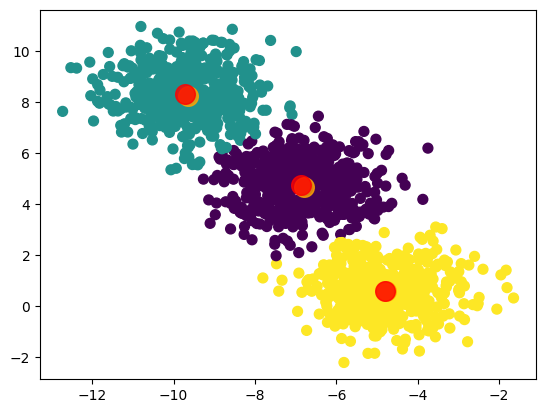

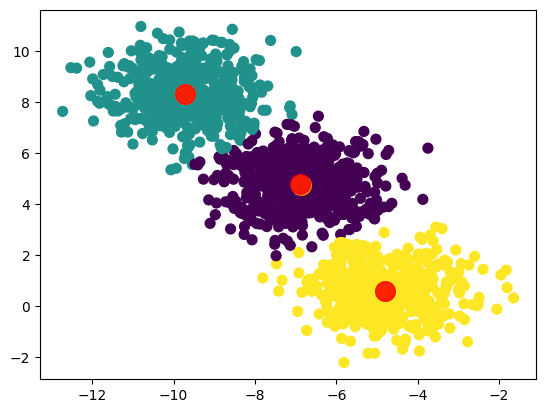

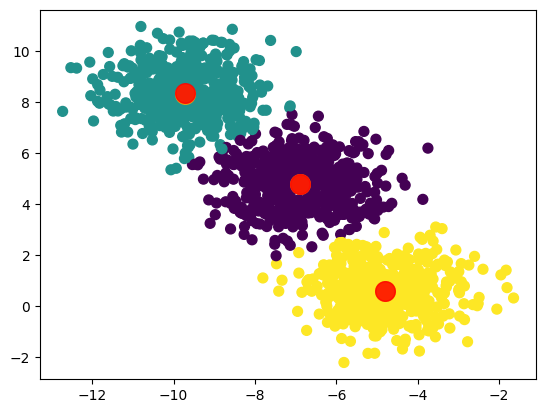

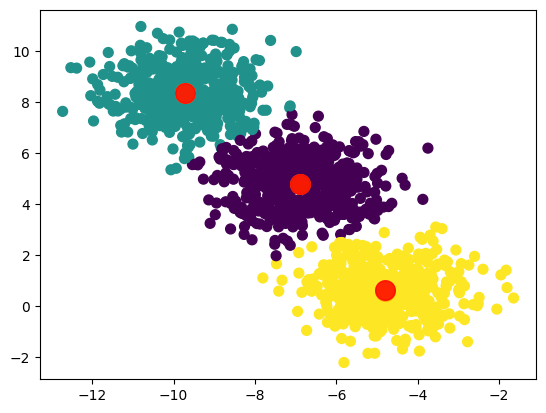

In [42]:
# Boucle jusqu’à ce que les centroïdes ne bougent plus
while True:
    # Étape 1 : attribuer chaque point au centroïde le plus proche
    labels = pairwise_distances_argmin(X, centers)

    # Étape 2 : recalculer les centroïdes (moyenne des points de chaque cluster)
    new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

    # Étape 3 : vérifier la convergence (si les centroïdes ne changent plus)
    if np.all(centers == new_centers):
        break  # Stop, K-Means a convergé

    # Affichage de l’évolution
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')  # Points colorés par cluster
    plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)  # Ancien centroïdes
    plt.scatter(new_centers[:, 0], new_centers[:, 1], c='red', s=200, alpha=0.8)  # Nouveaux centroïdes

    centers = new_centers  # Mise à jour des centroïdes

    plt.show()  # Affiche la figure à chaque itération


# Dans la vraie vie, avec Scikit learn c'est beaucoup plus simple

In [43]:
from sklearn.cluster import KMeans  # Importe l'algo KMeans déjà implémenté dans scikit-learn

kmeans = KMeans(n_clusters=3, random_state=random_state)  # Initialise un modèle KMeans avec 3 clusters et une graine aléatoire fixe


In [44]:
labels = kmeans.fit_predict(X)  # Entraîne le modèle sur X et assigne un cluster à chaque point (renvoie les labels)

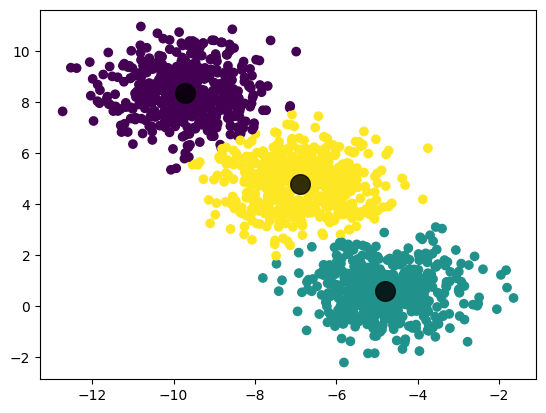

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=labels);  # Affiche les points colorés selon leur cluster attribué
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);  # Affiche les centroïdes finaux en noir


et voilà !

## **Limites** de KMeans

## On doit connaitre K

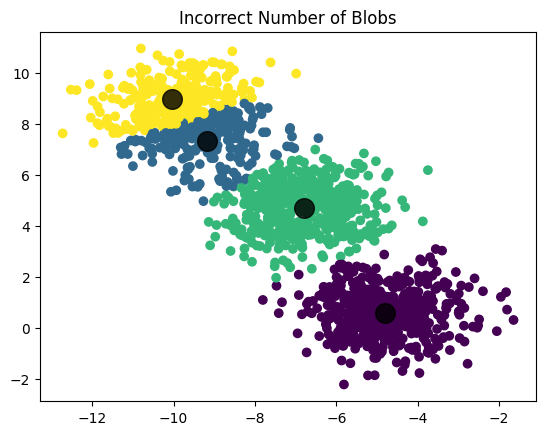

In [46]:
kmeans = KMeans(n_clusters=4, random_state=213)  # Initialise KMeans avec 4 clusters (mauvais choix ici)

labels = kmeans.fit_predict(X)  # Attribue chaque point à l'un des 4 clusters

plt.scatter(X[:, 0], X[:, 1], c=labels);  # Affiche les points colorés selon les mauvais clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8)  # Affiche les centroïdes
plt.title("Incorrect Number of Blobs");


# Attention à la distribution des données

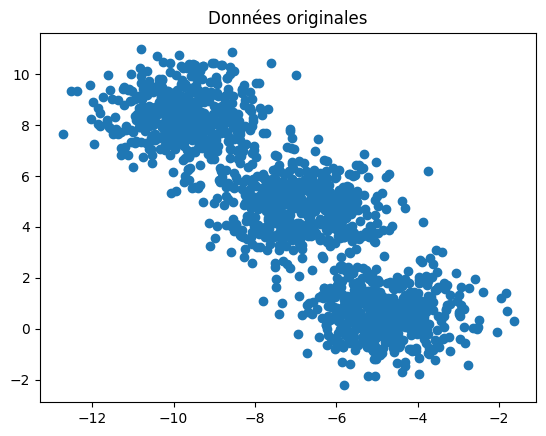

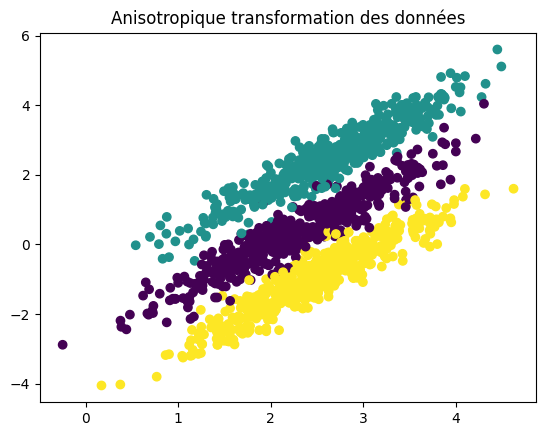

In [47]:
transformation = [[-0.60834549, -0.63667341], [-0.40887718, -0.85253229]]  # Matrice de transformation pour rendre les données anisotropes

X_aniso = np.dot(X, transformation)  # Applique la transformation linéaire à X (modifie l'orientation/forme des clusters)

plt.scatter(X[:, 0], X[:, 1]);  # Affiche les données originales
plt.title("Données originales");
plt.show()

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y);  # Affiche les données transformées, colorées par labels d'origine
plt.title("Anisotropique transformation des données");
plt.show()


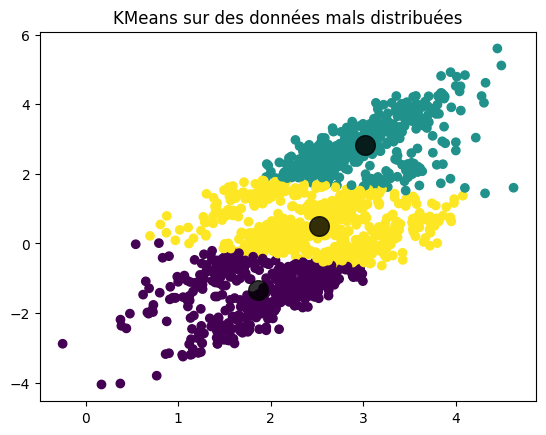

In [48]:
kmeans = KMeans(n_clusters=3, random_state=random_state)  # Crée un modèle KMeans avec 3 clusters sur les données transformées

y_pred = kmeans.fit_predict(X_aniso)  # Entraîne le modèle et prédit les clusters sur les données anisotropes

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred);  # Affiche les points colorés par cluster prédit
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);  # Affiche les centroïdes en noir
plt.title("KMeans sur des données mals distribuées");  # Affiche un titre indiquant une mauvaise répartition pour KMeans


## Et à leur variance

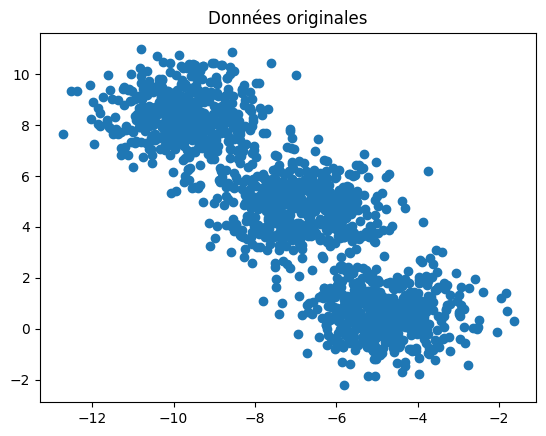

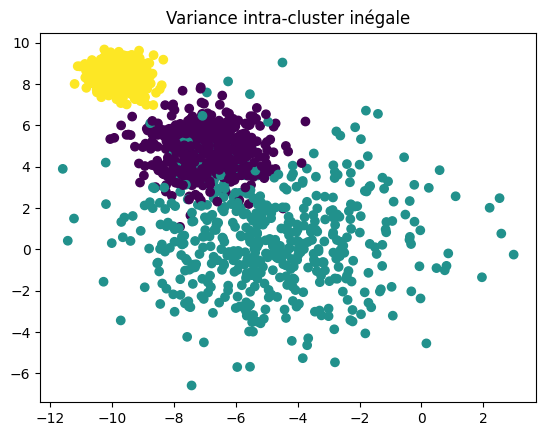

In [49]:
X_varied, y_varied = make_blobs(n_samples=n_samples,  # Génère de nouvelles données
                                cluster_std=[1.0, 2.5, 0.5],  # Donne une variance différente à chaque cluster
                                random_state=random_state)  # Seed fixe pour reproductibilité

plt.scatter(X[:, 0], X[:, 1]);  # Affiche les anciennes données (X)
plt.title("Données originales");
plt.show()

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied);  # Affiche les nouvelles données avec variances inégales
plt.title("Variance intra-cluster inégale");


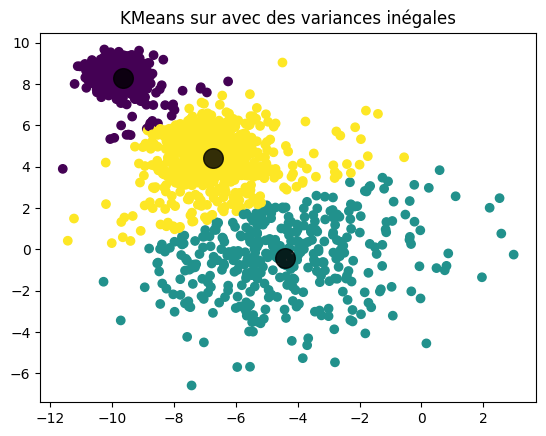

In [50]:
kmeans = KMeans(n_clusters=3, random_state=random_state)  # Initialise KMeans avec 3 clusters sur les données à variances inégales

y_pred = kmeans.fit_predict(X_varied)  # Entraîne le modèle et prédit les clusters

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred);  # Affiche les points colorés selon les clusters prédits
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);  # Affiche les centroïdes en noir
plt.title("KMeans sur avec des variances inégales");  # Indique que les clusters ont des tailles différentes (ce qui gêne KMeans)


## Ainsi que l'inégalité des cardinalités des clusters recherchés

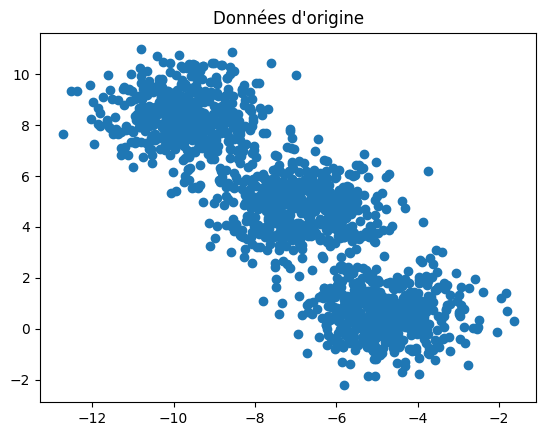

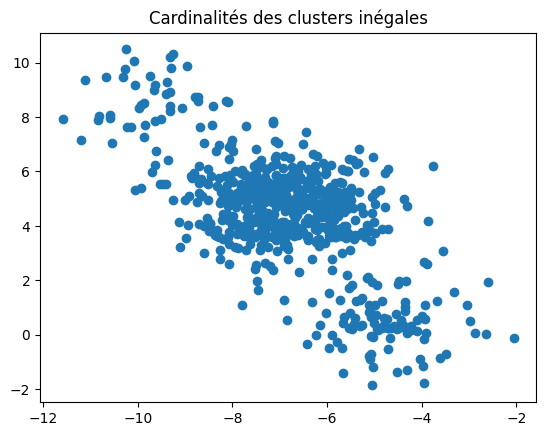

In [51]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:50]))  # Construit un nouveau dataset avec des tailles de clusters inégales

plt.scatter(X[:, 0], X[:, 1]);  # Affiche les données d'origine
plt.title('Données d\'origine')
plt.show();

plt.scatter(X_filtered[:, 0], X_filtered[:, 1]);  # Affiche les nouvelles données filtrées avec déséquilibre de taille entre clusters
plt.title('Cardinalités des clusters inégales')
plt.show();


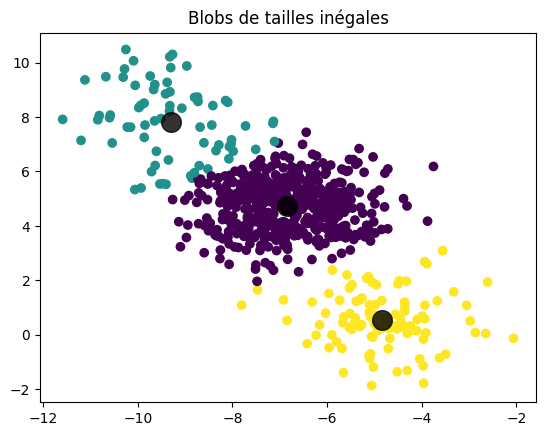

In [52]:
kmeans = KMeans(n_clusters=3, random_state=random_state)  # Initialise KMeans avec 3 clusters sur les données déséquilibrées

y_pred = kmeans.fit_predict(X_filtered)  # Applique KMeans et prédit les clusters

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred);  # Affiche les points colorés selon les clusters trouvés
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.8);  # Affiche les centroïdes
plt.title("Blobs de tailles inégales");  # Titre indiquant des clusters avec des effectifs très différents


## Quelques autres méthodes de clustering

KMeans n'est pas le seul algorithme de clustering existant. Voici quelques exemples d'algorithmes présents dans scikit learn :

- `sklearn.cluster.KMeans`
- `sklearn.cluster.MeanShift`
- `sklearn.cluster.DBSCAN`
- `sklearn.cluster.AffinityPropagation`
- `sklearn.cluster.SpectralClustering`
- `sklearn.cluster.Ward`

Observons leur efficacité sur quelques datasets artificiels

<img src="figures/cluster_comparison.png" width="80%">